<a href="https://colab.research.google.com/github/apeksha323/Credit-card-customer-churn-prediction/blob/main/credit_card_customer_churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd


In [4]:
df = pd.read_csv('/content/Churn_Modelling.csv')

In [5]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df.duplicated().sum()

0

In [9]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [10]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [11]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [12]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace = True)

In [13]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [15]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [16]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,0,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,1,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,True,False,True


In [18]:
X = df.drop(columns=['Exited'])
y = df['Exited']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [19]:
X_train.shape

(8000, 11)

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
X_train_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [22]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [33]:
model = Sequential()

model.add(Dense(11,activation='relu',input_dim = 11))
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [34]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 11)                132       
                                                                 
 dense_3 (Dense)             (None, 11)                132       
                                                                 
 dense_4 (Dense)             (None, 1)                 12        
                                                                 
Total params: 276 (1.08 KB)
Trainable params: 276 (1.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [35]:
model.compile(loss='binary_crossentropy',optimizer='Adam', metrics=['accuracy'])

In [41]:
history = model.fit(X_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3214 - accuracy: 0.8673 - val_loss: 0.3515 - val_accuracy: 0.8550
Epoch 2/100
200/200 [==============================] - 0s 1ms/step - loss: 0.3209 - accuracy: 0.8667 - val_loss: 0.3512 - val_accuracy: 0.8569
Epoch 3/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3205 - accuracy: 0.8672 - val_loss: 0.3500 - val_accuracy: 0.8519
Epoch 4/100
200/200 [==============================] - 0s 1ms/step - loss: 0.3210 - accuracy: 0.8664 - val_loss: 0.3502 - val_accuracy: 0.8544
Epoch 5/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3205 - accuracy: 0.8683 - val_loss: 0.3495 - val_accuracy: 0.8537
Epoch 6/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3209 - accuracy: 0.8670 - val_loss: 0.3503 - val_accuracy: 0.8562
Epoch 7/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3203 - accuracy: 0.8658 - val_loss: 0.3502 - val_accuracy: 0.8537

In [37]:
model.layers[0].get_weights()

[array([[-7.36836419e-02, -1.46183550e-01, -2.89320480e-02,
         -5.27731001e-01,  1.20004192e-01,  2.38448352e-01,
          2.46794503e-02,  2.82491386e-01, -4.12802756e-01,
          1.75083131e-01, -1.05527505e-01],
        [-8.41160640e-02,  3.05330724e-01, -9.05662239e-01,
          1.20970309e+00, -6.89361930e-01,  2.70796478e-01,
         -1.35533780e-01,  7.11019695e-01,  1.63445368e-01,
         -4.81651306e-01, -5.77328682e-01],
        [ 3.17322582e-01,  2.67500848e-01, -5.30578978e-02,
         -1.42292589e-01, -1.70319781e-01, -2.91966647e-01,
         -1.00549065e-01,  3.48096967e-01,  5.54474778e-02,
         -2.84741372e-01, -1.07004978e-01],
        [ 1.78347781e-01,  1.62212610e-01,  2.75946110e-01,
          4.79607396e-02,  3.08526331e-03, -2.85005599e-01,
          4.43391979e-01, -8.40939432e-02,  4.06537317e-02,
          1.20770484e-01, -1.57911509e-01],
        [ 7.11600780e-01, -1.27476111e-01,  1.34184569e-01,
          5.58854118e-02,  2.83037454e-01, -

In [38]:
y_log = model.predict(X_test_scaled)

63/63 [==============================] - 0s 880us/step


In [39]:
y_pred = np.where(y_log>0.5,1,0)

In [40]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8645

In [42]:
import matplotlib.pyplot as plt

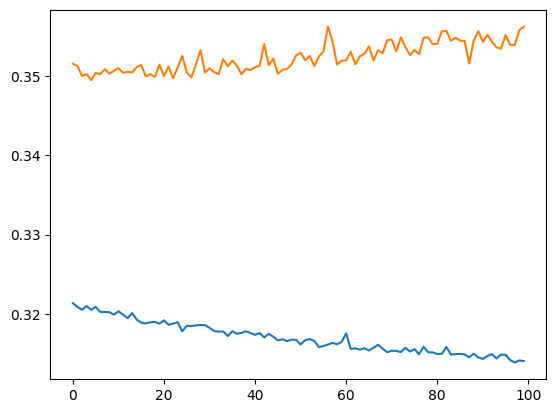

In [48]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

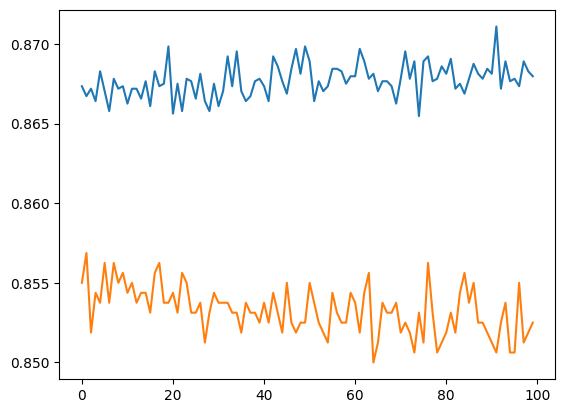

In [47]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])